### 拼接图片用来比较

In [1]:
import os
import cv2
import numpy as np


def concat_multiple_result_for_compare(base_dir, sub_dirs, save_dir, mid_dir, img_choose_id, img_num_of_each_result, axis=1):
    for root, dirnames, filenames in os.walk(os.path.join(base_dir, sub_dirs[0], mid_dir)):
        for filename in filenames:
            if '.jpg' not in filename:
                continue
            img_path = os.path.join(root, filename)
            imgs = []
            # print('img_path:', img_path)
            for idx, sub_dir in enumerate(sub_dirs):
                img = cv2.imread(img_path.replace('%s/' % sub_dirs[0], '%s/' % sub_dir))
                h, w = img.shape[:2]
                if img is None:
                    continue
                each_w = w // img_num_of_each_result
                if idx == 0:  # origin image
                    imgs.append(img[:, :each_w * 2])
                imgs.append(img[:, img_choose_id * each_w : (img_choose_id + 1) * each_w])
            # if len(imgs) != len(sub_dirs) + 1:
            #     continue
            concat_img = np.concatenate(imgs, axis=axis)
            # print('len(imgs):', len(imgs), concat_img.shape)
            save_path = img_path.replace(base_dir, save_dir)
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            cv2.imwrite(save_path, concat_img)

base_dir = '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang'
sub_dirs = ['v6', 'v6_2']
mid_dir = 'result/test/20000'
save_dir = '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/concat_v6-v6_2'
img_choose_id = 2
img_num_of_each_result = 3
axis = 1

concat_multiple_result_for_compare(base_dir, sub_dirs, save_dir, mid_dir, img_choose_id, img_num_of_each_result, axis)

### DataKit-数据处理

all train label distribution: {
    "huashang": 21,
    "jihaobi": 1123,
    "maoxie": 315,
    "moshang": 380,
    "pengshang": 417,
    "qianhuashang": 2686,
    "shenhuashang": 993,
    "unknown": 43,
    "youwu": 6685,
    "zangwu": 220
}
total_OK_cnt: 71, total_NG_cnt: 913
all eval label distribution: {
    "huashang": 2,
    "jihaobi": 108,
    "maoxie": 40,
    "moshang": 38,
    "pengshang": 46,
    "qianhuashang": 290,
    "shenhuashang": 127,
    "youwu": 675,
    "zangwu": 22
}
total_OK_cnt: 6, total_NG_cnt: 88


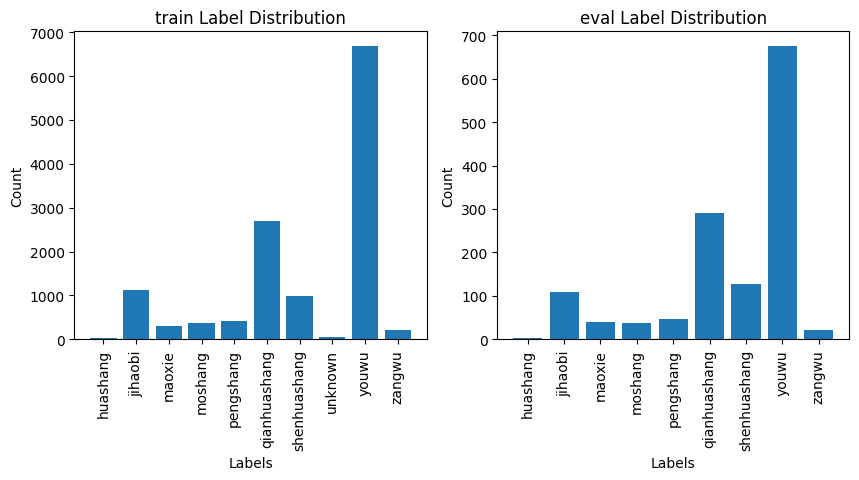

In [1]:
import sys
sys.path.append('/dataset/yonglinwu/SMore/DataKit')

from src.data_processor import DataProcessor

data_processor = DataProcessor()

# base_dir = '/dataset/yonglinwu/SMore/B698/temp/Dataset'
# sub_dirs = [
#     '20230711'
# ]
# data_processor.clear_imageData_in_json(base_dir, sub_dirs)

# # create symbolic links
# exp_yaml_path = '/dataset/yonglinwu/SMore/B698/EXPERIMENTS/pos3_v6/exp.yaml'
# src_dir = '/dataset/yonglinwu/SMore/B698/DATASETS/cropped2'
# dst_dir = '/dataset/yonglinwu/SMore/B698/temp/Dataset/3工位_all'
# tags = ['3工位']
# data_processor.create_symlinks(exp_yaml_path, src_dir, dst_dir, tags)

# get label statistics of a exp
exp_yaml_path = '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v21_1_alldata/exp.yaml'
certain_labels = []
# data_processor.delimiter = ','
data_processor.use_category_map = False
data_processor.get_stats_of_exp(exp_yaml_path, certain_labels)

# # get label statistics of a series of dataset directories
# base_dir = '/dataset/yonglinwu/SMore/CowellCamera/DATASETS/cropped/镜头内圈'
# img_json_dirs = [
#     ['20240330-0402_镜头内圈', None],
# ]
# tags = ['.bmp', '.png']
# certain_labels = []
# data_processor.get_stats_of_dirs(base_dir, img_json_dirs, tags, certain_labels)

### DataKit-实验辅助

In [1]:
import sys
sys.path.append('/dataset/yonglinwu/SMore/DataKit')

from src.experiment_helper import ExperimentHelper


def helper_func(experiment_helper, baseline_exp_dir_name, new_exp_dir_name, new_datasets):
    # before experiment: create experiment directory and add new dataset
    new_exp_dir = experiment_helper.create_experiment_dir(baseline_exp_dir_name, new_exp_dir_name)
    # experiment_helper.modify_dataset(new_exp_dir, new_datasets['train'], new_datasets['valid'], new_datasets['test'])

    # # after experiment: update model path and md5 value, record result
    # model_path = f'{new_exp_dir}/deploy/16000.onnx'
    # md5_value = experiment_helper.extract_md5(model_path)
    # print('MD5 Value:', md5_value)

    # sdk_config_path = '/dataset/yonglinwu/SMore/B698/temp/sdk_settings/PipelineHousingPos3.json'
    # keys_value_pairs = [
    #     [['xrack_cfg', 'xrack_module', 'engine_cfg', 'model_path'], model_path],
    #     [['xrack_cfg', 'xrack_module', 'engine_cfg', 'md5'], md5_value]
    # ]
    # experiment_helper.modify_sdk_config(sdk_config_path, keys_value_pairs)
    # experiment_helper.record_result(baseline_exp_dir_name, new_exp_dir)


data_root = '/dataset/yonglinwu/SMore/B735'
experiment_root = '/dataset/yonglinwu/SMore/B735/EXPERIMENTS'
experiment_helper = ExperimentHelper(data_root, experiment_root)

new_datasets = {
    'train': None,
    'valid': None,
    'test': None
}
baseline_exp_dir_name = 'D_v31_4'
for new_exp_dir_name in ['D_v31_4_2', 'D_v31_4_3', 'D_v31_4_4', 'D_v31_4_5', 'D_v31_4_6']:
    helper_func(experiment_helper, baseline_exp_dir_name, new_exp_dir_name, new_datasets)

###############################################################################

# data_root = '/dataset/yonglinwu/SMore/B627/'
# experiment_root = '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang'
# experiment_helper = ExperimentHelper(data_root, experiment_root)

# new_datasets = {}
# baseline_exp_dir_name = 'v11'
# for new_exp_dir_name in ['v11_new_2', 'v11_new_3', 'v11_new_4', 'v11_new_5', 'v11_new_6']:
#     helper_func(experiment_helper, baseline_exp_dir_name, new_exp_dir_name, new_datasets)

### resize测试

In [1]:
import cv2
import numpy as np
from PIL import Image

# img_path = '/dataset/yonglinwu/SMore/AnJieiPad/Dataflow/.df/data/明场0908-0911/3/2/明场/14/20230908103035647_A101200078CopperM23081812B2309040110857_46_NG_light.jpg'
img_path = 'a.jpg'
img = cv2.imread(img_path)
new_size = (2800, 4000)

resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_NEAREST)
cv2.imwrite('0.png', resized_img)
resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)
cv2.imwrite('1.png', resized_img)
resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_CUBIC)
cv2.imwrite('2.png', resized_img)
resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)
cv2.imwrite('3.png', resized_img)
resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_LANCZOS4)
cv2.imwrite('4.png', resized_img)


# 将图像从BGR格式转换为RGB格式
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 创建PIL Image对象
pil_image = Image.fromarray(image_rgb)
# 调整图像大小并使用LANCZOS插值算法
resized_image = pil_image.resize(new_size, Image.LANCZOS)
# 保存调整大小后的图像
resized_image.save('7.png')

resized_image = pil_image.resize(new_size, Image.BILINEAR)
resized_image.save('5.png')
resized_image = pil_image.resize(new_size, Image.BICUBIC)
resized_image.save('6.png')
resized_image = pil_image.resize(new_size, Image.BOX)
resized_image.save('8.png')
resized_image = pil_image.resize(new_size, Image.HAMMING)
resized_image.save('9.png')


### 计算数据集的mean和std

In [ ]:
import yaml
import cv2
import numpy as np
import os

yaml_content = """
data_path:
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/trainlist_20230630-0711.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/trainlist_20230815-0816.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/train_20230818-0819.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/train_20230822-0823.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/train_20230824.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/train_20230828.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/train_20230923-1010.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/testlist_20230630-0711.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/test_20230818-0819.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/test_20230828.txt
    - root: /dataset/yonglinwu/SMore/B698
      path: /dataset/yonglinwu/SMore/B698/DATASETS/datalist/2工位/test_20230923-1010.txt
"""

data = yaml.safe_load(yaml_content)

# 初始化存储所有图片数据的列表
sums = np.zeros(3)
squared_sums = np.zeros(3)
num_pixels = 0

delimiter = '||'
# 遍历data中的所有路径
for item in data['data_path']:
    # 打开TXT文件
    with open(item['path'], 'r') as f:
        lines = f.readlines()
        for line in lines:
            # 使用delimiter分割每一行
            img_path, _ = line.strip().split(delimiter)
            # 读取图片
            img = cv2.imread(os.path.join(item['root'], img_path)) / 255
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float64)
            # 计算图片的sum和squared sum
            sums += np.sum(img, axis=(0, 1))
            squared_sums += np.sum(np.square(img), axis=(0, 1))
            num_pixels += img.shape[0] * img.shape[1]

print('sums:', sums, 'squared_sums:', squared_sums, 'num_pixels:', num_pixels)

# 计算每个通道的mean和std
mean = sums / num_pixels
std = np.sqrt((squared_sums / num_pixels) - np.square(mean))

print('Mean: ', mean)
print('Std: ', std)

### 测试MyLoss

In [2]:
import torch
import torch.nn as nn
from SMore_core.model.loss_base import LossBase
from SMore_core.model.model_builder import LOSS
from SMore_core.utils.common import gpu_available
from SMore_core.utils.config import merge_dict
from torch.nn import functional as F

from SMore_seg.default_config.loss_defaults import LossDefaults
from SMore_seg.model.model_builder import build_sampler

def init_class_weights(class_weights, num_classes):
    if class_weights is None:
        class_weights = [1.0 for _ in range(num_classes)]
    return class_weights

from SMore_core.utils.schema import Optional
from SMore_core.default_config.loss_defaults import LossDefaults as BaseLossDefaults


MyLoss_cfg = {
    Optional('type', default='MyLoss'): str,
    'num_classes': int,
    Optional('ignore_label', default=255): int,
    Optional('certain_classes', default=[]): lambda x: isinstance(x, list),
    Optional('certain_class_weights', default=None): lambda x: x is None or isinstance(x, list),
    Optional('kernel_size', default=15): int,
    **BaseLossDefaults.LossBase_cfg
}


@LOSS.register_module()
class MyLoss(LossBase):
    DEFAULT_CONFIG = MyLoss_cfg

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.kwargs = merge_dict(MyLoss_cfg, self.kwargs)
        self.num_classes = self.kwargs.get('num_classes')
        self.ignore_label = self.kwargs.get('ignore_label')
        self.certain_classes = self.kwargs.get('certain_classes')
        self.certain_class_weights = init_class_weights(
            self.kwargs.get('certain_class_weights'), len(self.certain_classes))
        self.certain_class_weights = torch.FloatTensor(self.certain_class_weights)
        self.k = self.kwargs.get('kernel_size')
        self.conv_weight = torch.ones((self.num_classes, 1, self.k, self.k))
        self.conv_weight[:, :, self.k // 2, self.k // 2] = 0
        if gpu_available():
            self.certain_class_weights = self.certain_class_weights.cuda()
            self.conv_weight = self.conv_weight.cuda()

    def _forward(self, predicts: torch.Tensor, targets: torch.Tensor, weights: torch.Tensor = None, **kwargs):
        """
        predicts: [N, C, H, W], targets: [N, H, W]
        """
        # probs = F.softmax(predicts, dim=1)
        probs = predicts
        preds = torch.argmax(probs, dim=1)
        print('preds:', preds, '\ntargets:', targets)

        # 初始化损失张量
        loss = torch.zeros((1), device=predicts.device)

        # 对于指定的类别
        for i, c in enumerate(self.certain_classes):
            # 计算FN (False Negative)
            fn = (preds != c) & (targets == c)
            fn = fn.unsqueeze(1).expand_as(probs)
            # fn = False * fn
            print('fn:', fn)
            # if torch.all(fn == False):
            #     # 如果不跳过，loss计算出来是nan
            #     continue

            # 计算周围k*k个像素的平均概率分布，不考虑背景类别和kernel中心的像素
            non_bg_mask = ((targets.unsqueeze(1) != 0) & (targets.unsqueeze(1) != self.ignore_label)).float()
            sum_probs_fn = F.conv2d(probs * non_bg_mask, weight=self.conv_weight, padding='same', groups=self.num_classes)
            non_bg_cnt_in_kernel = F.avg_pool2d(non_bg_mask, self.k, stride=1, padding=self.k//2, divisor_override=1)
            non_bg_cnt_in_kernel -= non_bg_mask
            avg_probs_fn = sum_probs_fn / (non_bg_cnt_in_kernel + 1e-8)
            print('non_bg_mask:', non_bg_mask)
            print('sum_probs_fn:', sum_probs_fn)
            print('non_bg_cnt:', non_bg_cnt_in_kernel)
            print('avg_probs_fn:', avg_probs_fn)
            print('probs[fn]:', probs[fn])

            # 计算KL散度
            kl_div_fn = F.kl_div(probs[fn].log(), avg_probs_fn[fn], reduction='none')
            print('kl_div:', kl_div_fn.reshape(3, -1), kl_div_fn.shape)

            # 计算平均
            loss += kl_div_fn.mean() * self.certain_class_weights[i]

        return loss



myloss_cfg = {
    'num_classes': 3,
    'ignore_label': 255,
    'certain_classes': [1, 2],
    'certain_class_weights': [1.0, 1.0],
    'kernel_size': 3
}
# 创建MyLoss实例
my_loss = MyLoss(**myloss_cfg)

# 生成简单的数据
predicts = torch.tensor([[[[0.1, 0.2, 0.3, 0.4, 0.5],
                           [0.2, 0.3, 0.4, 0.5, 0.6],
                           [0.3, 0.4, 0.5, 0.6, 0.7],
                           [0.4, 0.5, 0.6, 0.7, 0.8],
                           [0.5, 0.6, 0.7, 0.8, 0.9]],

                          [[0.5, 0.4, 0.3, 0.2, 0.1],
                           [0.6, 0.5, 0.4, 0.3, 0.2],
                           [0.7, 0.6, 0.5, 0.4, 0.3],
                           [0.8, 0.7, 0.6, 0.5, 0.4],
                           [0.9, 0.8, 0.7, 0.6, 0.5]],

                          [[0.4, 0.3, 0.2, 0.1, 0.2],
                           [0.5, 0.4, 0.3, 0.2, 0.1],
                           [0.6, 0.5, 0.4, 0.3, 0.2],
                           [0.7, 0.6, 0.5, 0.4, 0.3],
                           [0.8, 0.7, 0.6, 0.5, 0.4]]]])

targets = torch.tensor([[[1, 1, 2, 0, 1],
                         [1, 2, 2, 1, 1],
                         [2, 2, 1, 0, 2],
                         [2, 1, 1, 0, 2],
                         [1, 1, 2, 2, 1]]])

# 计算损失
loss = my_loss._forward(predicts, targets)
print(loss)

import torch

A = torch.randn(4, 6, 1500, 2048)
B = torch.randint(0, 2, (4, 1500, 2048), dtype=torch.bool)

B = B.unsqueeze(1).expand_as(A)
mask = B

# 使用掩码来索引 A
result = A[mask]


preds: tensor([[[1, 1, 0, 0, 0],
         [1, 1, 0, 0, 0],
         [1, 1, 0, 0, 0],
         [1, 1, 0, 0, 0],
         [1, 1, 0, 0, 0]]]) 
targets: tensor([[[1, 1, 2, 0, 1],
         [1, 2, 2, 1, 1],
         [2, 2, 1, 0, 2],
         [2, 1, 1, 0, 2],
         [1, 1, 2, 2, 1]]])
fn: tensor([[[[False, False, False, False,  True],
          [False, False, False,  True,  True],
          [False, False,  True, False, False],
          [False, False,  True, False, False],
          [False, False, False, False,  True]],

         [[False, False, False, False,  True],
          [False, False, False,  True,  True],
          [False, False,  True, False, False],
          [False, False,  True, False, False],
          [False, False, False, False,  True]],

         [[False, False, False, False,  True],
          [False, False, False,  True,  True],
          [False, False,  True, False, False],
          [False, False,  True, False, False],
          [False, False, False, False,  True]]]])
non

### 测试transform

(1500, 1200, 3)


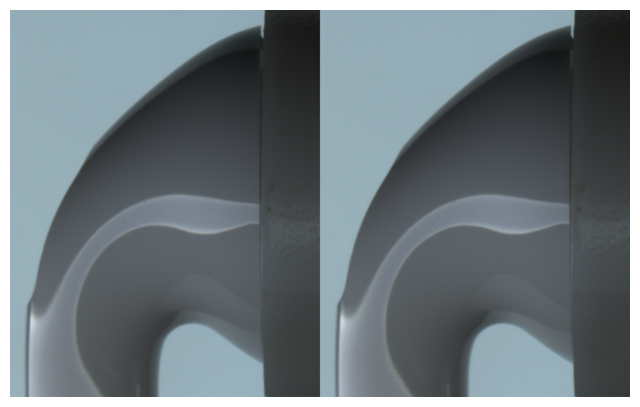

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from SMore_core.dataset.transform import PhotoMetricDistortion, ColorJitter

def visualize(image):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)


img_path = '/dataset/yonglinwu/SMore/B698/DATASETS/cropped2/20230828/上午更新前/housing2/OK黑点/housing 2工位 0629_3_5783-2_20230828_104854805_19_lamp0-lamp1_6000_2_origin_0.bmp'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

inputs = {'img': img.copy()}
# PhotoMetricDistortion()(inputs)
# ColorJitter(prob=1)(inputs)
ColorJitter(prob=1, brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)(inputs)
augmented_img = inputs['img']

res_img = np.concatenate([img, augmented_img], 1)

visualize(res_img)

### 删除实验目录下的模型文件

In [2]:
import os
import glob


def remove_model_files(dir_path, k=5):
    # Iterate over all subfolders
    for root, dirs, files in os.walk(dir_path):
        if 'model' in dirs:
            model_dir = os.path.join(root, 'model')
            pth_files = glob.glob(os.path.join(model_dir, 'model_*.pth'))

            # Remove the path of the final model
            final_model_path = os.path.join(model_dir, 'model_final.pth')
            if final_model_path in pth_files:
                pth_files.remove(final_model_path)

            # Sort the models by iteration number
            pth_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))
            print(pth_files)

            # Delete all but the k models with the highest iteration number
            for pth_file in pth_files[:-k]:
                os.remove(pth_file)


# Define the directory where the subfolders are located
dir_path = '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang'

# Define the number of models to keep
k = 1

remove_model_files(dir_path, k)

['/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_500.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_1000.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_1500.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_2000.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_2500.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_3000.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_3500.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_4000.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_4500.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16_1_alldata/model/model_5000.pth', '/dataset/yonglinwu/SMore/B627/EXPERIMENTS/TongZhouGuang/v16

### 根据txt文件，创建符号链接

In [2]:
import os

txt_file = '/dataset/yonglinwu/SMore/B735/DATASETS/datalist/D面_test/test_20240622-0709.txt'
src_root = '/dataset/yonglinwu/SMore/B735'
dst_dir = '/dataset/yonglinwu/SMore/B735/DATASETS/test/20240717_test'
prefix_in_txt_file = 'DATASETS/cropped/D面/'

with open(txt_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

for line in lines:
    path = line.split('||')[0].strip()
    source_path = os.path.join(src_root, path)
    destination_path = os.path.join(dst_dir, path.replace(prefix_in_txt_file, ''))

    os.makedirs(os.path.dirname(destination_path), exist_ok=True)
    os.symlink(source_path, destination_path)

### temp

text size: (201, 65)


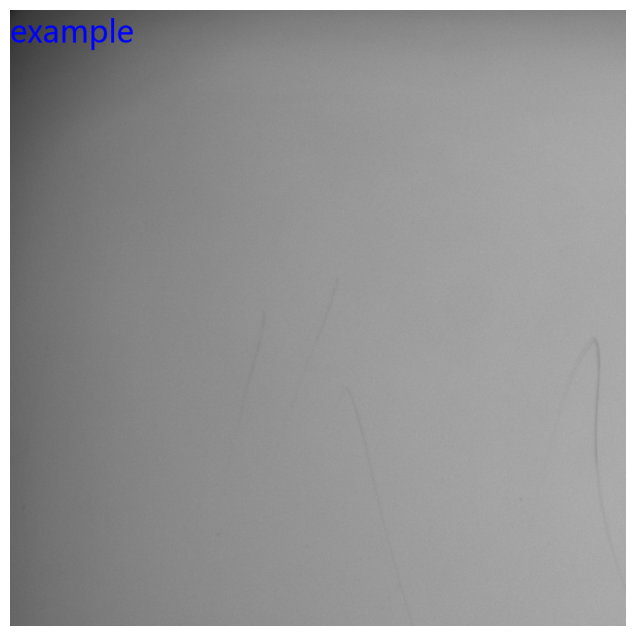

In [1]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt

def visualize(image):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)

def draw_ch_text(img, pos, text, color, font_size=50, is_first=True, is_last=True):
    """
    img: imread读取的图片;
    pos: (x, y), 字符起始绘制的位置;
    text: 显示的文字;
    color: 文字的颜色
    """
    if is_first:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)
        draw = ImageDraw.Draw(img)
        # simhei.ttf 是字体，你如果没有字体，需要下载
        font = ImageFont.truetype('/dataset/yonglinwu/SMore/SMore-OCR2/MSYH.TTC', font_size, encoding='utf-8')
    print('text size:', font.getsize(text))
    draw.text(pos, text, color, font=font, anchor='la')
    # if is_last:
    #     img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    return img


img = cv2.imread('/dataset/yonglinwu/SMore/B627/b627/results/origin/TongZhouGuang/20231205-tz_model1207v1/be_out/inference/PipelineBE1_tz/1205 BE跑料/同轴/划伤/检测正常/BE 2工位 1024_3_4209-1_20231205_100505612_24_lamp03_10000_1_origin_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)[500:1500, 500:1500, :]

text = 'example'
# text = codecs.encode(text, 'utf-8')

# cv2.putText(img, text, (500, 500), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
img = draw_ch_text(img, (0, 0), text, (0, 0, 255))

# ft2 = cv2.freetype.createFreeType2()
# ft2.loadFontData('/dataset/yonglinwu/SMore/SMore-OCR2/MSYH.TTC', 0)
# ft2.putText(img, "Brunch真好吃！", (500, 200), 100, (0, 255, 0), cv2.FILLED, cv2.LINE_AA, False)

visualize(img)


### 比较onnx模型

In [ ]:
import onnx
from onnx_diff.diff import OnnxDiff


# model_1 model_2 完全相同
model_1 = onnx.load(r"C:\Users\w5yl\Desktop\40000_old.onnx")
model_2 = onnx.load(r"C:\Users\w5yl\Desktop\40000.onnx")
model_3 = onnx.load(r"C:\Users\w5yl\Desktop\ac_0826_v1.onnx")

diff = OnnxDiff(model_1, model_2,)
results = diff.summary(output=True)
print(results)